<a href="https://colab.research.google.com/github/Mussie-A/Mussie-Portfolio/blob/main/DA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 1: Install and import dependencies

In [ ]:
# %pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.optimizers import Adam #type: ignore
from tensorflow.keras.layers import Dense, Dropout #type: ignore
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold,KFold,GridSearchCV
from scikeras.wrappers import KerasClassifier #type: ignore

In [ ]:
dataset_path = "/content/DA_data/rta_data.csv"
data = pd.read_csv(dataset_path)

In [ ]:
print("Dataset Info:\n")
data.info()
# print(data.shape)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment 

In [ ]:
# Summary statistics for categorical columns
categorical_columns = data.select_dtypes(include=["object"]).columns
print("Categorical Descriptive Stats:")
data[categorical_columns].describe()

Categorical Descriptive Stats:


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [ ]:
print("First 5 Rows:")
data.head()

First 5 Rows:


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


Section 2: In depth inspection of the dataset in order to decide what kind of preprocessing we need to apply

In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
missing_values

Missing Values:


,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


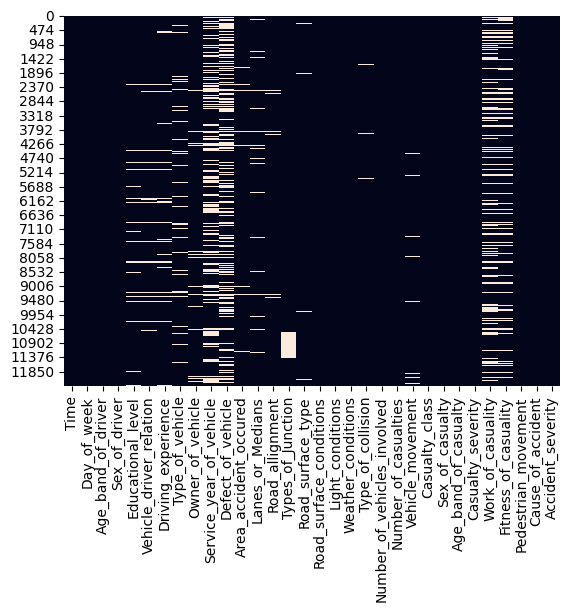

In [ ]:
# Visually representing missing data patterns
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [ ]:
# Target variable count
target_count = data["Accident_severity"].value_counts()
print("Target count")
target_count

Target count


,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


In [ ]:
# Summary statistics for numeric columns
numerical_columns = data.select_dtypes(include=["float", "int"]).columns
print("Numeric Columns Descriptive Stats:")
data[numerical_columns].describe()

Numeric Columns Descriptive Stats:


,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


Section 3: Pre processing phase

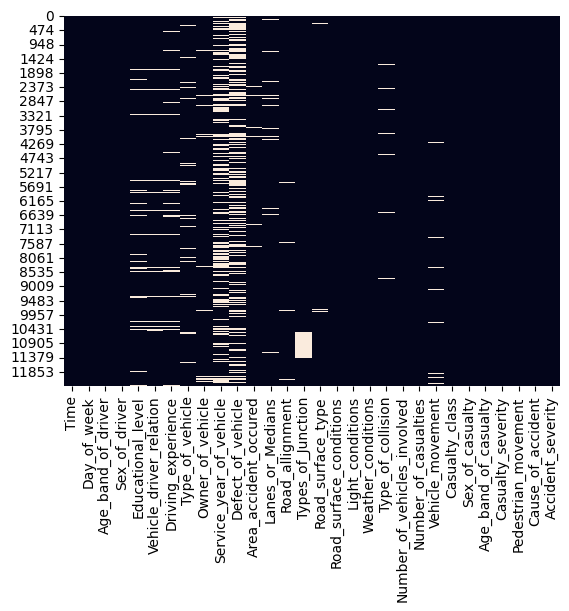

In [ ]:
# Removing rows with too many missing values
data = data.dropna(thresh=len(data.columns) - 10)
data = data.drop(columns=['Work_of_casuality', 'Fitness_of_casuality'])
sns.heatmap(data.isnull(), cbar=False)
plt.show()


In [ ]:
# Substituting null values for numerical data with median
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

In [ ]:
# Substituting null values for categorical data with unknown
missing_categorical_cols = ['Service_year_of_vehicle', 'Defect_of_vehicle']
data[missing_categorical_cols] = data[missing_categorical_cols].fillna('Unknown')

In [ ]:
categorical_columns = data.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
var_thresholder = VarianceThreshold(threshold=0.01)
X_low_var = var_thresholder.fit_transform(data.drop(columns=["Accident_severity"]))
low_variance_columns = data.drop(columns=["Accident_severity"]).columns[~var_thresholder.get_support()]
print("\nLow-Variance Columns Removed:\n", low_variance_columns)
data = data.drop(columns=low_variance_columns)


Low-Variance Columns Removed:
 Index([], dtype='object')


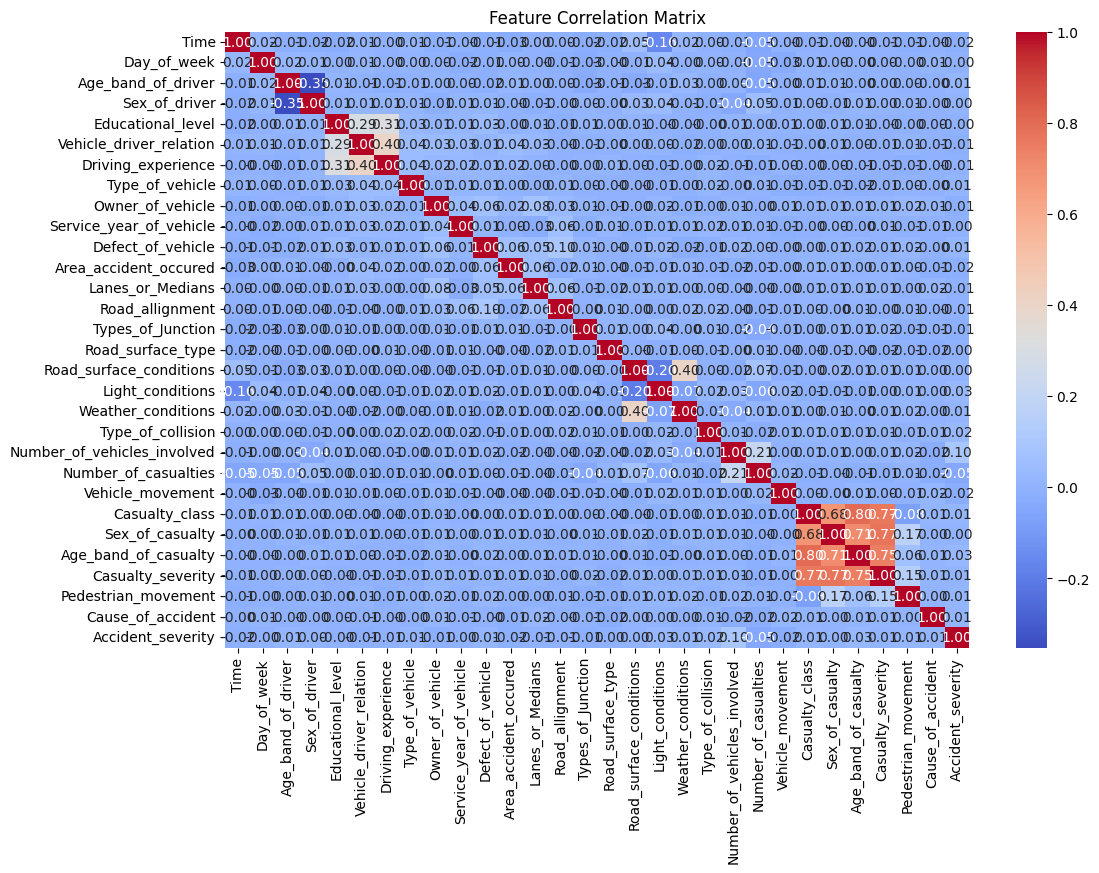

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if col1 != col2 and abs(correlation_matrix[col1][col2]) > 0.9]
high_corr_features = set(pair[1] for pair in high_corr_pairs)
print("\nHighly Correlated Features Removed:\n", high_corr_features)
data = data.drop(columns=high_corr_features)


Highly Correlated Features Removed:
 set()


In [ ]:
target_column = "Accident_severity"
X = data.drop(columns=[target_column])
y = data[target_column]

In [ ]:
# Over sample the data
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [ ]:
# under sample the data
# rus = RandomUnderSampler(random_state=42)
# X, y = rus.fit_resample(X, y)

In [ ]:
#Scaling our data since our models are distance based
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Checking the shape of my training and testing set
print("\nTrain-Test Split:\n")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Train-Test Split:

X_train: (24991, 29), X_test: (6248, 29)
y_train: (24991,), y_test: (6248,)


Section 3: Training the Model

In [ ]:
classifier = KNeighborsClassifier()

# Explore different values for my classifier parameters
parameter_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ['uniform', 'distance'],
    "metric": ['euclidean', 'manhattan']
}

print("Tuning hyperparameters for K-Nearest Neighbors...")

# Create GridSearchCV object for classifier
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=parameter_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and cross-validation score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Get the mean and standard deviation of the cross-validation accuracy for the best model
best_index = grid_search.best_index_
mean_accuracy = grid_search.cv_results_['mean_test_score'][best_index]
std_accuracy = grid_search.cv_results_['std_test_score'][best_index]

print(f"Mean cross-validation accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nK-Nearest Neighbors Model Performance (Test Set - with best hyperparameters):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Tuning hyperparameters for K-Nearest Neighbors...
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.8865
Mean cross-validation accuracy: 0.8865 ± 0.0020

K-Nearest Neighbors Model Performance (Test Set - with best hyperparameters):
Accuracy: 0.8971
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2082
           1       0.81      0.96      0.88      2083
           2       0.96      0.73      0.83      2083

    accuracy                           0.90      6248
   macro avg       0.91      0.90      0.89      6248
weighted avg       0.91      0.90      0.89      6248



In [ ]:
classifier = GaussianNB()
# Explore different values for my classifier parameters
parameter_grid = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

print("Tuning hyperparameters for Naïve Bayes...")

# Create GridSearchCV object for classifier
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=parameter_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and cross-validation score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Get the mean and standard deviation of the cross-validation accuracy for the best model
best_index = grid_search.best_index_
mean_accuracy = grid_search.cv_results_['mean_test_score'][best_index]
std_accuracy = grid_search.cv_results_['std_test_score'][best_index]

print(f"Mean cross-validation accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nNaïve Bayes Model Performance (Test Set - with best hyperparameters):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Tuning hyperparameters for Naïve Bayes...
Best hyperparameters: {'var_smoothing': 1e-09}
Best cross-validation score: 0.5446
Mean cross-validation accuracy: 0.5446 ± 0.0032

Naïve Bayes Model Performance (Test Set - with best hyperparameters):
Accuracy: 0.5309
              precision    recall  f1-score   support

           0       0.51      0.72      0.60      2082
           1       0.46      0.34      0.39      2083
           2       0.62      0.53      0.57      2083

    accuracy                           0.53      6248
   macro avg       0.53      0.53      0.52      6248
weighted avg       0.53      0.53      0.52      6248



In [ ]:
# Define the model
def create_model(input_shape, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Store results
accuracies = []

# Perform K-Fold Cross-Validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nFold {fold + 1}/{k}")

    # Split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create and train the model
    model = create_model(X_train_fold.shape[1], len(np.unique(y_train)))
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=20,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        verbose=1
    )

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

# Calculate average accuracy and standard deviation
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"\nCross-Validation Results:")
print(f"Mean Accuracy: {mean_accuracy:.4f} (+/- {std_accuracy:.4f})")


Fold 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4867 - loss: 1.0119 - val_accuracy: 0.6465 - val_loss: 0.7869
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6408 - loss: 0.7897 - val_accuracy: 0.7045 - val_loss: 0.6885
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6750 - loss: 0.7232 - val_accuracy: 0.7337 - val_loss: 0.6238
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6972 - loss: 0.6706 - val_accuracy: 0.7570 - val_loss: 0.5763
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7243 - loss: 0.6242 - val_accuracy: 0.7752 - val_loss: 0.5412
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7297 - loss: 0.6067 - val_accuracy: 0.7838 - val_loss: 0.5046
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7425 - loss: 0.5732 - val_accuracy: 0.7980 - val_loss: 0.4864
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7578 - loss: 0.5481 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4973 - loss: 1.0044 - val_accuracy: 0.6619 - val_loss: 0.7717
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6361 - loss: 0.7911 - val_accuracy: 0.7093 - val_loss: 0.6783
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6735 - loss: 0.7273 - val_accuracy: 0.7349 - val_loss: 0.6140
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7024 - loss: 0.6673 - val_accuracy: 0.7575 - val_loss: 0.5659
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7261 - loss: 0.6233 - val_accuracy: 0.7661 - val_loss: 0.5320
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7383 - loss: 0.5860 - val_accuracy: 0.7819 - val_loss: 0.4982
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7511 - loss: 0.5651 - val_accuracy: 0.7927 - val_loss: 0.4811
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7613 - loss: 0.5420 - val_accuracy: 0.7977 - val_

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4989 - loss: 0.9942 - val_accuracy: 0.6517 - val_loss: 0.7738
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6365 - loss: 0.7966 - val_accuracy: 0.7023 - val_loss: 0.6871
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6818 - loss: 0.7166 - val_accuracy: 0.7307 - val_loss: 0.6215
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7041 - loss: 0.6562 - val_accuracy: 0.7483 - val_loss: 0.5722
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7280 - loss: 0.6201 - val_accuracy: 0.7633 - val_loss: 0.5345
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7456 - loss: 0.5829 - val_accuracy: 0.7737 - val_loss: 0.5122
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7523 - loss: 0.5648 - val_accuracy: 0.7815 - val_loss: 0.4900
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7598 - loss: 0.5449 - val_accuracy: 0.7851 - val_

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5166 - loss: 0.9769 - val_accuracy: 0.6507 - val_loss: 0.7747
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6328 - loss: 0.8023 - val_accuracy: 0.7007 - val_loss: 0.6920
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6771 - loss: 0.7280 - val_accuracy: 0.7333 - val_loss: 0.6289
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7056 - loss: 0.6636 - val_accuracy: 0.7607 - val_loss: 0.5786
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7235 - loss: 0.6314 - val_accuracy: 0.7705 - val_loss: 0.5364
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7427 - loss: 0.5882 - val_accuracy: 0.7811 - val_loss: 0.5093
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7503 - loss: 0.5633 - val_accuracy: 0.7913 - val_loss: 0.4862
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7584 - loss: 0.5386 - val_accuracy: 0.8063 - val_

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4710 - loss: 1.0255 - val_accuracy: 0.6551 - val_loss: 0.7902
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6315 - loss: 0.8024 - val_accuracy: 0.7037 - val_loss: 0.6839
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6683 - loss: 0.7275 - val_accuracy: 0.7313 - val_loss: 0.6206
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6956 - loss: 0.6686 - val_accuracy: 0.7545 - val_loss: 0.5773
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7213 - loss: 0.6293 - val_accuracy: 0.7719 - val_loss: 0.5354
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7366 - loss: 0.5951 - val_accuracy: 0.7805 - val_loss: 0.5044
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7390 - loss: 0.5701 - val_accuracy: 0.7929 - val_loss: 0.4872
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7569 - loss: 0.5458 - val_accuracy: 0.7947 - val_

In [ ]:
def create_model(units_1=64, dropout_1=0.2, units_2=32, dropout_2=0.2, learning_rate=0.001):
    model = Sequential([
        Dense(units_1, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_1),
        Dense(units_2, activation='relu'),
        Dropout(dropout_2),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Wrap the Keras model in a KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'units_1': [32, 64, 128],  # Number of units in the first dense layer
    'dropout_1': [0.1, 0.2, 0.3],  # Dropout rate in the first layer
    'units_2': [16, 32, 64],  # Number of units in the second dense layer
    'dropout_2': [0.1, 0.2, 0.3],  # Dropout rate in the second layer
    'learning_rate': [0.001, 0.01, 0.1]  # Learning rate for the optimizer
}

# Initialize K-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform Grid Search with K-Fold Cross-Validation
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=kf,  # Use K-Fold Cross-Validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Print progress
)

grid_search = grid.fit(X_train, y_train)
# Print the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Print the best cross-validation accuracy
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Get the mean and standard deviation of the cross-validation accuracy for the best model
best_index = grid_search.best_index_
mean_accuracy = grid_search.cv_results_['mean_test_score'][best_index]
std_accuracy = grid_search.cv_results_['std_test_score'][best_index]

print(f"Mean cross-validation accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

AttributeError: 'super' object has no attribute '__sklearn_tags__'